<ipython-input-28-8901cf0dc8c8>:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylab)


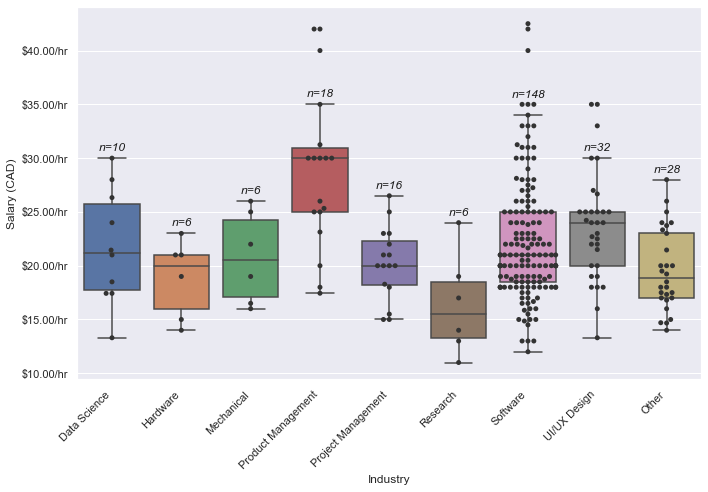

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('responses.csv')
data.head()

salary_1a = data.loc[data['currency_1a'] == "cad"]['salary_1a']
salary_1b = data.loc[data['currency_1b'] == "cad"]['salary_1b']
salary_2a = data.loc[data['currency_2a'] == "cad"]['salary_2a']
salary_2b = data.loc[data['currency_2b'] == "cad"]['salary_2b']
salary_3a = data.loc[data['currency_3a'] == "cad"]['salary_3a']
salary_3b = data.loc[data['currency_3b'] == "cad"]['salary_3b']

industry_1a = data.loc[data['currency_1a'] == "cad"]['industry_1a']
industry_1b = data.loc[data['currency_1b'] == "cad"]['industry_1b']
industry_2a = data.loc[data['currency_2a'] == "cad"]['industry_2a']
industry_2b = data.loc[data['currency_2b'] == "cad"]['industry_2b']
industry_3a = data.loc[data['currency_3a'] == "cad"]['industry_3a']
industry_3b = data.loc[data['currency_3b'] == "cad"]['industry_3b']

city_1a = data.loc[data['currency_1a'] == "cad"]['city_1a']
city_1b = data.loc[data['currency_1b'] == "cad"]['city_1b']
city_2a = data.loc[data['currency_2a'] == "cad"]['city_2a']
city_2b = data.loc[data['currency_2b'] == "cad"]['city_2b']
city_3a = data.loc[data['currency_3a'] == "cad"]['city_3a']
city_3b = data.loc[data['currency_3b'] == "cad"]['city_3b']

salaries = salary_1a.append(
           salary_1b, ignore_index=True).append(
           salary_2a, ignore_index=True).append(
           salary_2b, ignore_index=True).append(
           salary_3a, ignore_index=True).append(
           salary_3b, ignore_index=True)

industries = industry_1a.append(
             industry_1b, ignore_index=True).append(
             industry_2a, ignore_index=True).append(
             industry_2b, ignore_index=True).append(
             industry_3a, ignore_index=True).append(
             industry_3b, ignore_index=True)

cities = city_1a.append(
         city_1b, ignore_index=True).append(
         city_2a, ignore_index=True).append(
         city_2b, ignore_index=True).append(
         city_3a, ignore_index=True).append(
         city_3b, ignore_index=True)

df = pd.DataFrame({
    "Salary (CAD)": salaries,
    "Industry": industries,
    "City": cities
})

industry_sorted = list(set(df['Industry']))
industry_sorted.remove('Other')
industry_sorted = sorted(industry_sorted)
industry_sorted.append('Other')

city_sorted = list(set(df['City']))
city_sorted = sorted(city_sorted)

x = "Industry"
y = "Salary (CAD)"
order = industry_sorted

fig, ax = plt.subplots(figsize=(10,7))
p = sns.boxplot(x=x,y=y,order=order,data=df,showfliers=False)
p = sns.swarmplot(x=x,y=y,order=order,data=df,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

max_sorted = []
for i in order:
    data = df[df[x] == i][y]
    q1, q3 = data.quantile([0.25,0.75])
    max_sorted.append(max(data.where(data <= q3 + 1.5*(q3-q1))))

ns = [df[x].tolist().count(i) for i in order]

for i,xtick in enumerate(p.get_xticks()):
    if i == 6:
        p.text(xtick,max_sorted[i]+1.6,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')
    else:
        p.text(xtick,max_sorted[i]+0.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')

fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.tight_layout()
plt.savefig('cad_industry.png')

<ipython-input-29-a12f5a1d31f4>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylab)


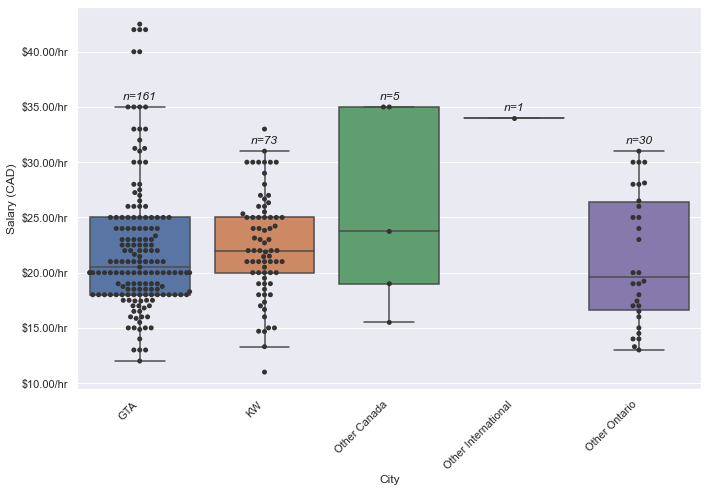

In [29]:
x = "City"
order = city_sorted

fig, ax = plt.subplots(figsize=(10,7))
p = sns.boxplot(x=x,y=y,order=order,data=df,showfliers=False)
p = sns.swarmplot(x=x,y=y,order=order,data=df,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

max_sorted = []
for i in order:
    data = df[df[x] == i][y]
    q1, q3 = data.quantile([0.25,0.75])
    max_sorted.append(max(data.where(data <= q3 + 1.5*(q3-q1))))

ns = [df[x].tolist().count(i) for i in order]

for i,xtick in enumerate(p.get_xticks()):
    p.text(xtick,max_sorted[i]+0.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')

fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.tight_layout()
plt.savefig('cad_city.png')

<ipython-input-30-655c09cf96dd>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylab)


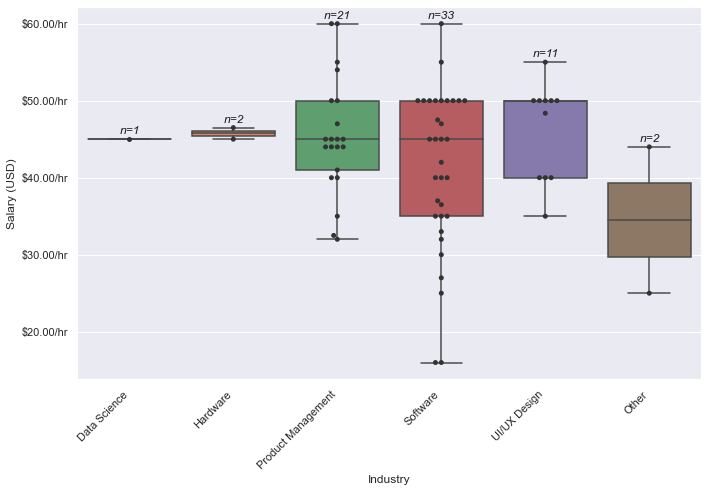

In [30]:
data = pd.read_csv('responses.csv')
data.head()

salary_1a = data.loc[data['currency_1a'] == "usd"]['salary_1a']
salary_1b = data.loc[data['currency_1b'] == "usd"]['salary_1b']
salary_2a = data.loc[data['currency_2a'] == "usd"]['salary_2a']
salary_2b = data.loc[data['currency_2b'] == "usd"]['salary_2b']
salary_3a = data.loc[data['currency_3a'] == "usd"]['salary_3a']
salary_3b = data.loc[data['currency_3b'] == "usd"]['salary_3b']

industry_1a = data.loc[data['currency_1a'] == "usd"]['industry_1a']
industry_1b = data.loc[data['currency_1b'] == "usd"]['industry_1b']
industry_2a = data.loc[data['currency_2a'] == "usd"]['industry_2a']
industry_2b = data.loc[data['currency_2b'] == "usd"]['industry_2b']
industry_3a = data.loc[data['currency_3a'] == "usd"]['industry_3a']
industry_3b = data.loc[data['currency_3b'] == "usd"]['industry_3b']

city_1a = data.loc[data['currency_1a'] == "usd"]['city_1a']
city_1b = data.loc[data['currency_1b'] == "usd"]['city_1b']
city_2a = data.loc[data['currency_2a'] == "usd"]['city_2a']
city_2b = data.loc[data['currency_2b'] == "usd"]['city_2b']
city_3a = data.loc[data['currency_3a'] == "usd"]['city_3a']
city_3b = data.loc[data['currency_3b'] == "usd"]['city_3b']

salaries = salary_1a.append(
           salary_1b, ignore_index=True).append(
           salary_2a, ignore_index=True).append(
           salary_2b, ignore_index=True).append(
           salary_3a, ignore_index=True).append(
           salary_3b, ignore_index=True)

industries = industry_1a.append(
             industry_1b, ignore_index=True).append(
             industry_2a, ignore_index=True).append(
             industry_2b, ignore_index=True).append(
             industry_3a, ignore_index=True).append(
             industry_3b, ignore_index=True)

cities = city_1a.append(
         city_1b, ignore_index=True).append(
         city_2a, ignore_index=True).append(
         city_2b, ignore_index=True).append(
         city_3a, ignore_index=True).append(
         city_3b, ignore_index=True)

df = pd.DataFrame({
    "Salary (USD)": salaries,
    "Industry": industries,
    "City": cities
})

industry_sorted = list(set(df['Industry']))
industry_sorted.remove('Other')
industry_sorted = sorted(industry_sorted)
industry_sorted.append('Other')

city_sorted = list(set(df['City']))
city_sorted = sorted(city_sorted)

x = "Industry"
y = "Salary (USD)"
order = industry_sorted

fig, ax = plt.subplots(figsize=(10,7))
p = sns.boxplot(x=x,y=y,order=order,data=df,showfliers=False)
p = sns.swarmplot(x=x,y=y,order=order,data=df,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

max_sorted = []
for i in order:
    data = df[df[x] == i][y]
    q1, q3 = data.quantile([0.25,0.75])
    max_sorted.append(max(data.where(data <= q3 + 1.5*(q3-q1))))

ns = [df[x].tolist().count(i) for i in order]

for i,xtick in enumerate(p.get_xticks()):
    p.text(xtick,max_sorted[i]+0.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')

fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.tight_layout()
plt.savefig('usd_industry.png')

<ipython-input-31-90765c089ae6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylab)


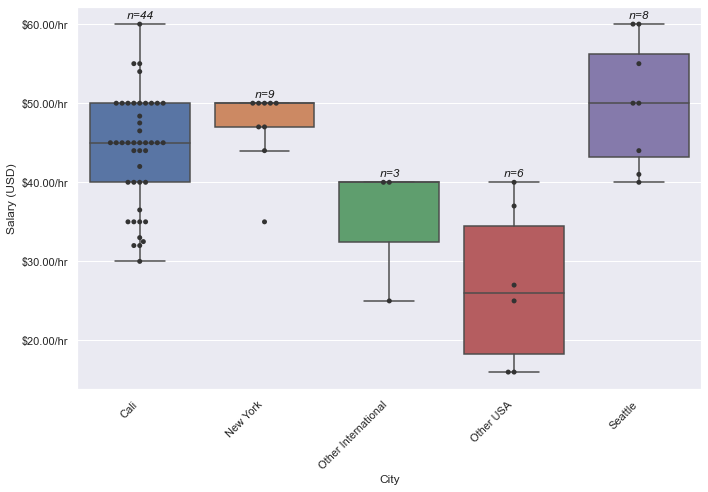

In [31]:
x = "City"
order = city_sorted

fig, ax = plt.subplots(figsize=(10,7))
p = sns.boxplot(x=x,y=y,order=order,data=df,showfliers=False)
p = sns.swarmplot(x=x,y=y,order=order,data=df,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

max_sorted = []
for i in order:
    data = df[df[x] == i][y]
    q1, q3 = data.quantile([0.25,0.75])
    max_sorted.append(max(data.where(data <= q3 + 1.5*(q3-q1))))

ns = [df[x].tolist().count(i) for i in order]

for i,xtick in enumerate(p.get_xticks()):
    p.text(xtick,max_sorted[i]+0.7,'n='+str(ns[i]),horizontalalignment='center',color='k',style='italic')

fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.tight_layout()
plt.savefig('usd_city.png')